### 1) make blobs는 대표적인 군집화용 데이터 생성기
### 2) make blobs는 개별 군집의 중심점과 표준 편차 제어 기능이 추가
    a) n_samples = 데이터의 개수
    b) n_features = 열의 개수
    c) centers = 군집의 개수
    d) cluster_std = 생성될 군집의 표준편차

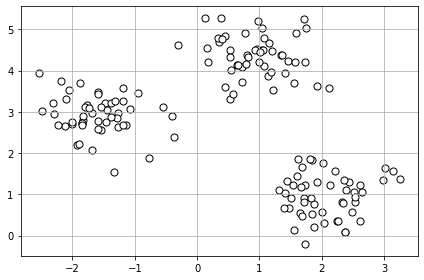

In [2]:
from sklearn.datasets import make_blobs

data, target = make_blobs(n_samples=150,
                         n_features=2,
                         centers=3,
                         cluster_std=0.5,
                         shuffle=True,
                         random_state=0)

import matplotlib.pyplot as plt
## s 매개변수는 마커의 size 결정.
plt.scatter(data[:,0], data[:,1], c='white', marker='o', edgecolor='black', s=50)

plt.grid()
## 자동으로 명시된 여백에 관련된 서브플롯 파라미터 조정.
plt.tight_layout()
plt.show()

### KMeans 다음의 4단계로 요약.
    1) 샘플 포인트에서 램덤하게 k개의 센트로이드를 초기 클러스터 중심으로 선택.
    2) 각 샘플을 가장 가까운 센트로이드에 할당.(평균값)
    3) 할당된 샘플들의 중심으로 센트로이드 이동
    4) 클러스터 할당이 변하지 않거나 사용자가 지정한 허용 오차나 최대 반복 횟수에 도달할 때까지 2번 3번 반복

### 샘플 간의 유사도는 어떻게 측정
### 유클리디안 거리의 제곱(연속적인 특성을 가진 샘플을 클러스터로 묶는다.)
    1) 클러스터 내 제곱 오차합(SSE)
    2) 클러스터 관성을 반복적으로 최소화.

In [3]:
from sklearn.cluster import KMeans

## 클러스터 개수: 3개로 지정(단점)

## n_init = 10으로 설정, 
## k-평균 군집 알고리즘을 각기 다른 랜덤한 센트로이드에서 독립적으로 10번 실행하여 가장 낮은 SSE를 만드는 하나를 최종 모델로 선택

## max_iter = 한 번의 실행에서 수행할 최대 반복 횟수
## 사이킷런의 k-평균 구현은 최대 반복 횟수에 도달하기 전에 수럼하면, 일찍 종료.

## tol = 수렴을 결정하는 클러스터 내 제곱 오차합의 변화량에 대한 허용 오차를 조정.
## 수렴에 문제가 있다면 tol 매개변수 값을 늘리는 것이 한가지 방법

## K-Means의 한가지 문제: 하나 이상의 빈 클러스터 존재 가능성.
## --> 사이킷런의 k-평균은 이러한 문제 해결(한 클러스터가 비어있다면, 빈 클러스터의 센트로이드에서 가장 멀리 떨어진 샘플 찾는다.)
## K-메도이드 / 퍼지 C-평균 에서 해결.

## 거리 지표인 경우, 특성의 스케일이 같은 지 확인이 필수.

km = KMeans(n_clusters=3,
           init='random',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

target_km = km.fit_predict(data)
print(target_km)

import numpy as np
np.unique(target_km, return_counts=True)

[1 0 0 0 1 0 0 1 2 0 1 2 2 0 0 2 2 1 2 1 0 1 0 0 2 1 1 0 2 1 2 2 2 2 0 1 1
 1 0 0 2 2 0 1 1 1 2 0 2 0 1 0 0 1 1 2 0 1 2 0 2 2 2 2 0 2 0 1 0 0 0 1 1 0
 1 0 0 2 2 0 1 1 0 0 1 1 1 2 2 1 1 0 1 0 1 0 2 2 1 1 1 1 2 1 1 0 2 0 0 0 2
 0 1 2 0 2 0 0 2 2 0 1 0 0 1 1 2 1 2 2 2 2 1 2 2 2 0 2 1 2 0 0 1 1 2 2 2 2
 1 1]


(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

### 데이터셋에서 k-평균이 식별한 클러스터와 센트로이드 시각화

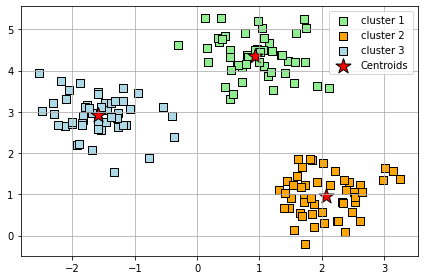

In [6]:
plt.scatter(data[target_km == 0, 0],
            data[target_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1'
           )

plt.scatter(data[target_km == 1, 0],
            data[target_km == 1, 1],
            s=50, c='orange',
            marker='s', edgecolor='black',
            label='cluster 2'
           )

plt.scatter(data[target_km == 2, 0],
            data[target_km == 2, 1],
            s=50, c='lightblue',
            marker='s', edgecolor='black',
            label='cluster 3'
           )

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250, c='red',
            marker='*', edgecolor='black',
            label='Centroids'            
           )

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()